### Aula 1 - Dados com muitas dimensões

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('exames.csv')

In [3]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [5]:
dados.drop(columns='exame_33', inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

In [13]:
SEED = 123143
np.random.seed(SEED)

x = dados.drop(columns=['id', 'diagnostico'])
y = dados['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                       test_size = 0.3)

In [14]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(treino_x, treino_y)
print(str(round(model.score(teste_x, teste_y)*100, 2))+'%')

91.81%


In [20]:
from sklearn.dummy import DummyClassifier
SEED = 123143
np.random.seed(SEED)

model = DummyClassifier(strategy='most_frequent')
model.fit(treino_x, treino_y)
print(str(round(model.score(teste_x, teste_y)*100, 2))+'%')



66.67%


## Aula 2 - Avançando e explorando dados

In [29]:
dados

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [43]:
# dados_plot = pd.melt(dados.drop(columns='id'), id_vars='diagnostico',
#                      var_name='exames', value_name='valores')

In [44]:
dados_plot = pd.melt(dados, id_vars='diagnostico',
                     var_name='exames', value_vars='exame_1', value_name='valores')

In [45]:
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


<Axes: xlabel='exames', ylabel='valores'>

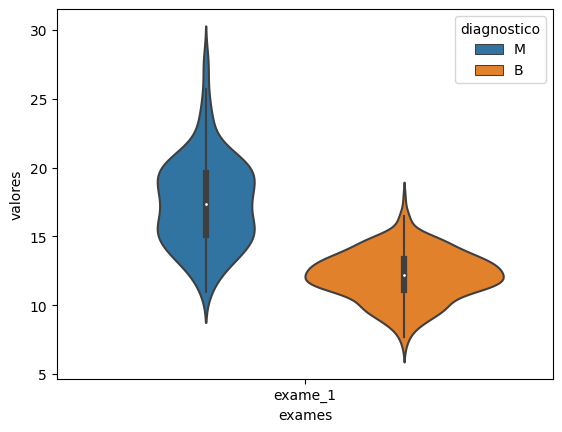

In [46]:
sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot)

In [47]:
dados_plot.describe()

,valores
count,569.000000
mean,14.127292
std,3.524049
min,6.981000
25%,11.700000
50%,13.370000
75%,15.780000
max,28.110000
